In [64]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True):
    # cwd = os.getcwd() + "images"
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    # mode = "a" if os.path.exists(path) else "w"
    print("saving figure", fig_id)
    # Êñ∞Âª∫ÁõÆÂΩï ‰∏çÁÑ∂‰πü‰ºöÊä•Èîô
    # Êñ∞Âª∫pngÊñá‰ª∂ ‰∏çÁÑ∂Êâæ‰∏çÂà∞ËØ•Êñá‰ª∂‰ºöÊä•Èîô chapter_id ÊâãÂä®ÂàõÂª∫
    if not os.path.isdir(os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)):
        os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID))
    if not os.path.exists(path):
        with open(path, 'w'):
            pass
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [65]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
# ‰∏çÁî®ËøîÂõûÂÄºÔºåÂè™ÊòØÂ§ÑÁêÜ‰∫Ü‰∏Ä‰∏ãmnist‰∏≠Ê†áÁ≠æ‰π±Â∫èÁöÑÈóÆÈ¢ò

In [66]:
import ssl
# Ê≤°Êúâ‰∏ãÈù¢ÁöÑ ‰ºöÊä•Èîô: SSL certification
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [67]:
# ctrl + M: change mode of cell
# ctrl + o/k: ÊîπÂèòcellÈïøÂ∫¶
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, cache=True) # cache Â≠òÂà∞ÁºìÂ≠ò‰∏≠ Á¨¨‰∏ÄÊ¨°‰∏çÂØπÂä≤ ÂÜçfetchÂ∞±Â•Ω‰∫Ü

In [68]:
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)
mnist["data"].shape
mnist["target"].shape

(70000,)

In [100]:
X, y = mnist["data"], mnist["target"] # mnist is Bunch, mnist["data"] = mnist.data
np.where(y==8)[0][10]

48210

In [70]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

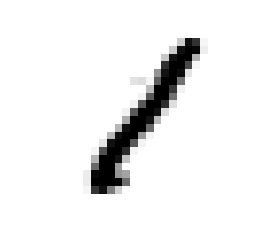

In [102]:
plot_digit(X[11999])

In [72]:
# ÊãºÊé•Âçï‰∏™ÂõæÁâá -> Ë°åÂõæÁâá -> ÂÆåÊï¥ÁöÑx*xÂõæÁâá
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1 # e.g.: 10 -> 9 // 10 + 1 -> 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

saving figure more_digits_plot


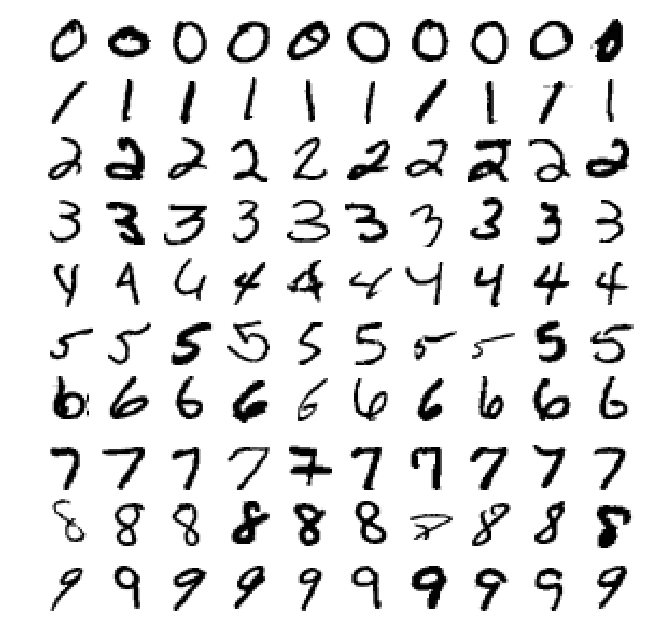

In [73]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]] # X[start:end:step] end is exclusive!
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [103]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [104]:
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [110]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [111]:
from sklearn.linear_model import SGDClassifier # Á∫øÊÄßÂàÜÁ±ªÂô® sklearn‰∏≠ÊòØlinear svmÔºåÊ±ÇËß£Âô®‰∏∫sgd

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [113]:
sgd_clf.predict([X[36000]]) # [] ‰∏çËÉΩÂ∞ë

array([ True])

#### classifierÁöÑËØÑ‰ª∑ÊåáÊ†á

#### 1„ÄÅ‰∫§ÂèâÈ™åËØÅ

In [121]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [126]:
from sklearn.base import BaseEstimator
# pred is all False
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [127]:
# ËÆ≠ÁªÉÈõÜ‰∏≠Êï∞ÊçÆÂàÜÂ∏ÉÂæà‰∏çÂùáË°°ÁöÑÊÉÖÂÜµ‰∏ãÔºåÂáÜÁ°ÆÁéáÂπ∂‰∏çÊòØÂæàÂ•ΩÁöÑËØÑ‰ª∑ÊåáÊ†áÔºåÂç≥‰ΩøÂÖ®ÁåúfalseÔºå‰πüÊúâ90%ÁöÑÂáÜÁ°ÆÁéá
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

#### 2„ÄÅconfusion matrix

In [129]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)
# matrix: row1: not 5, col1: right pred
# 52373: true negatives, 1307: false positives, 1077: false negatives, 4344: true positives

array([[53272,  1307],
       [ 1077,  4344]])

3„ÄÅprecision & recall (based on **true positives**)

$precision = \frac{TP}{TP + FP}$ÂàÜÁ±ªÂô®È¢ÑÊµãÊòØ5ÔºåÂáÜÁ°ÆÁéáÔºü$recall = \frac{TP}{TP + FN}$: ÊâÄÊúâÁöÑtagÊòØ5ÁöÑÊ†∑Êú¨ÈáåÔºåÂàÜÁ±ªÂô®È¢ÑÊµãÂØπ‰∫ÜÂ§öÂ∞ëÔºü

In [131]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [132]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [133]:
4344/(1077+4344)

0.801328168234643

F<sub>1</sub>=$\Large\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$: ÁªºÂêà‰∫Ü‰∏äÈù¢‰∏§‰∏™Ôºå‰ΩÜÊòØÊòØÂπ≥Á≠âÂØπÂæÖ‰∏§ËÄÖ if: ËßÜÈ¢ëÈâ¥ÈªÑ recallÂ∞±ÊØîprecisionÊõ¥ÈáçË¶ÅÔºåÂ∞ΩÂèØËÉΩÂ§öÁöÑÊâæÂá∫hÁöÑ -> ËøáÊª§Êéâ

In [134]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

precision & recall **Tradeoff**

In [139]:
y_scores = sgd_clf.decision_function([X[36000]])

In [140]:
y_scores

array([161855.74572176])

In [141]:
# default threshold: 0, Â¢ûÂä†thresholdÔºårecallËÇØÂÆöÈôç‰ΩéÔºåprecisionÂ§ß‰Ωì‰∏äÊòØÂ¢ûÂä†ÁöÑÔºå‰∏≠Èó¥Á®çÊúâÊ≥¢Âä®
threshold = 0
y_scores > threshold

array([ True])

In [146]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [150]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [155]:
precisions.shape

(59699,)

saving figure precision_recall_vs_threshold_plot


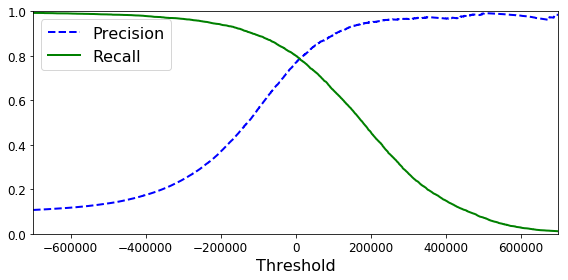

In [167]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc='upper left', fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [159]:
(y_train_pred == (y_scores>0)).all() # sgdÈªòËÆ§ÁöÑthreshold: 0

True

In [160]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90) # labels vs around 90% precision threshold

0.8659205116491548

In [161]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

saving figure percision_vs_recall_plot


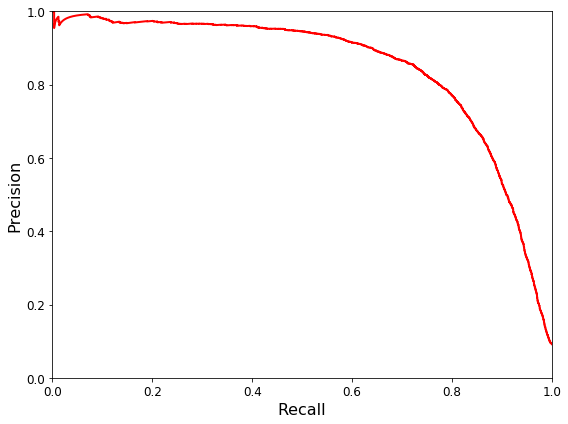

In [164]:
# Ë¶ÅÊ±Ç99%precisionÔºåË¶ÅÂºÑÊ∏ÖrecallÊòØÂ§öÂ∞ë
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'r-', linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("percision_vs_recall_plot")
plt.show()

#### 3„ÄÅROC Êõ≤Á∫ø(receiver operating characteristic)

ROC = $\frac{TPR}{NPR} = \frac{TPR}{1-NPR}$

In [185]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

saving figure roc_curve_plot


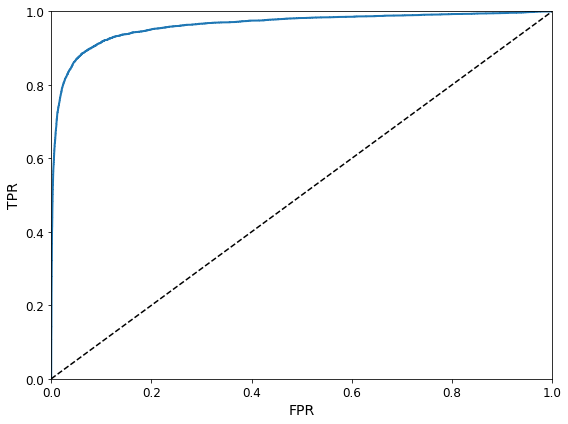

In [169]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

TPR Ë∂äÈ´òÔºåFPRÂ∞±Ë∂äÊêûÔºåËôöÁ∫øÊòØxjbÂàÜÁöÑÁªìÊûúÔºåbinary clfÂ∫îËØ•Â∞ΩÂèØËÉΩÂæÄÂ∑¶‰∏äËßíÈù†ÔºåÂç≥ **roc auc**Ë∂äÈù†Ëøë1Ë∂äÂ•Ω (aucÊõ≤Á∫ø‰∏ãÈù¢ÁßØ

In [170]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9624496555967156

#### ÂíåRFÁöÑÂØπÊØî

In [172]:
from sklearn.ensemble import RandomForestClassifier
# sklearnÁöÑÂàÜÁ±ªÂô® Ë¶Å‰πàÊúâdecision_functionÊñπÊ≥ï Ë¶Å‰πàÊúâpredict_probaÊñπÊ≥ï ÈöèÊú∫Ê£ÆÊûópredict_probaËøîÂõûÁöÑÊòØÊØè‰∏™labelÁöÑÊ¶ÇÁéá
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [186]:
y_scores_forest = probs_forest[:,1]
fpr_forest, tpr_forest, threshold = roc_curve(y_train_5, y_scores_forest)

saving figure ROC_curve_comparision


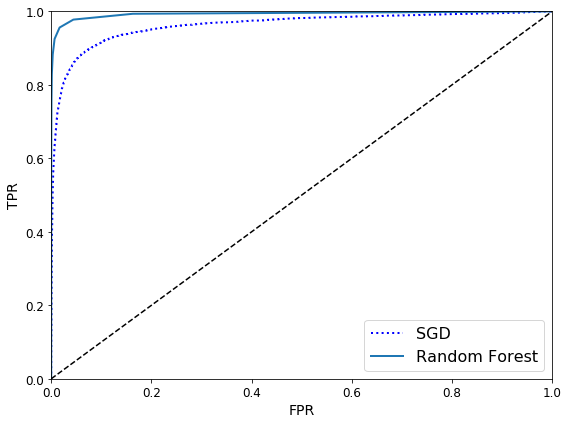

In [187]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("ROC_curve_comparision")
plt.show()

In [188]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [189]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [190]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

### Multiclass Classification: Â§öÂàÜÁ±ªÈóÆÈ¢ò

#### OvA & OvO: MNIST‰∏∫‰æãÔºåÂâçËÄÖË¶ÅÂú®ÂéüËÆ≠ÁªÉÈõÜ‰∏äËÆ≠ÁªÉ10‰∏™binary classifierÔºåË∞ÅÁªôÁöÑÂàÜÈ´òÂ∞±ÊòØËØ•Á±ª„ÄÇÂêéËÄÖË¶ÅÂú®ÂêÑËá™ÁöÑÂ≠êËÆ≠ÁªÉÈõÜ‰∏≠ËÆ≠ÁªÉ$C_{10}^{2}=45$‰∏™bianry classifierÔºåÁî®ÊäïÁ•®‰πãÁ±ªÁöÑÁªÑÂêàÊñπÊ≥ïÁ°ÆÂÆöÁªìÊûú
sklearn‰∏≠Ëá™Âä®ÈÄâÊã©OvAÁ≠ñÁï•(Èô§‰∫ÜSVMÂàÜÁ±ªÂô®Áî®OvOÔºåÂõ†‰∏∫SVMÂàÜÁ±ªÂô®ÈöèÁùÄÊ†∑Êú¨sizeÁöÑÂ¢ûÂä† ÊÄßËÉΩÂèòÂ∑Æ OvOÂè™Ë¶ÅÂú®ÈÉ®ÂàÜËÆ≠ÁªÉÈõÜ‰∏äËÆ≠ÁªÉ
#### ÈöèÊú∫Ê£ÆÊûóÂíånaive BayesÂàÜÁ±ªÂô®ÂèØ‰ª•ËøõË°åÂ§öÂàÜÁ±ªÔºåËÄåSVMÂíåÁ∫øÊÄßÂàÜÁ±ªÂô®ÂøÖÈ°ªÁªÑÂêàËµ∑Êù•ÊâçËÉΩËß£ÂÜ≥Â§öÂàÜÁ±ªÈóÆÈ¢ò

In [192]:
# sklearn ÂÆûÈôÖ‰∏äËÆ≠ÁªÉ‰∫Ü10‰∏™binary classifierÔºåÈÄâÊã©‰∫Üdecision scoreÊúÄÈ´òÁöÑÂàÜÁ±ªÂô®ÂØπÂ∫îÁöÑclass
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[36000]])

array([5], dtype=int8)

In [196]:
real_scores = sgd_clf.decision_function([X[36000]])
real_scores # 1*10 ndarray

In [197]:
np.argmax(real_scores)

5

In [199]:
sgd_clf.classes_[5] # classes_[5] Âç≥5thÂàÜÁ±ªÂô®ÂØπÂ∫îÁöÑclassÔºàÁ¢∞Â∑ßclassÂíåindex‰∏ÄÊ†∑

5

In [201]:
# ‰ΩøÁî®OvO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)) # Ê≤°ÊåáÂÆömax_iterÂíåtol‰ºöÂá∫Áé∞warning
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X[36000]])

array([5], dtype=int8)

In [202]:
len(ovo_clf.estimators_) # ËÆ≠ÁªÉ‰∫Ü45‰∏™ÂàÜÁ±ªÂô®

45

In [203]:
# ÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô®
forest_clf.fit(X_train, y_train)
forest_clf.predict([X[36000]])

array([5], dtype=int8)

In [205]:
np.argmax(forest_clf.predict_proba([X[36000]]))

5

In [206]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94041192, 0.93879694, 0.93949092])

In [207]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

In [209]:
# ÂØπËÆ≠ÁªÉÈõÜËøõË°åÈ¢ÑÂ§ÑÁêÜ, StandardScaler: z=(x-u)/s (u: mean, s: standard deviation)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

In [210]:
# error analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
cf_matrix = confusion_matrix(y_train, y_train_pred)

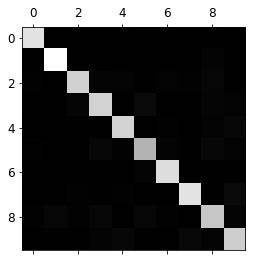

In [211]:
plt.matshow(cf_matrix, cmap=plt.cm.gray)
plt.show()

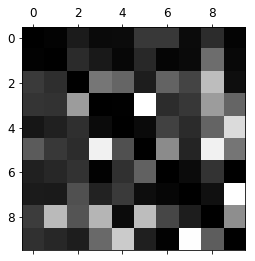

In [214]:
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cfm = cf_matrix / row_sums
np.fill_diagonal(norm_cfm, 0) # ‰∏çÁÑ∂ÂØπËßíÂÄºÂ§™È´ò ÂÖ∂‰ªñÁöÑÂ∞±Áúã‰∏çÊòéÊòæ‰∫Ü
plt.matshow(norm_cfm, cmap=plt.cm.gray)

saving figure error_analysis_digits_plot


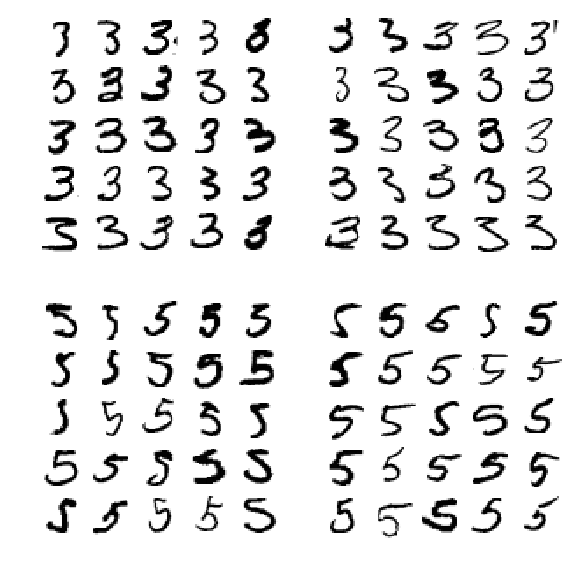

In [218]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 3 ËØØËÆ§‰∏∫ 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 5 ËØØËÆ§‰∏∫ 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) # ‰∏ÄËà¨ÊòØÊ≤°Êúâ;ÁöÑ Âêå‰∏ÄË°å ÂàÜÈöîÁî®
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

### Multilabels Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNNÂàÜÁ±ªÂô®ÁâπÁÇπ: None-parametic, Lazy.ËÆ≠ÁªÉËøáÁ®ãÂè™Ë¶ÅÊääËÆ≠ÁªÉÈõÜËÆ∞‰ΩèÂ∞±Ë°å È¢ÑÊµãÊó∂Ê†πÊçÆk neighborsÁöÑÊäïÁ•®ËøõË°åÂàÜÁ±ªÔºàifÂõûÂΩí Âèñk‰∏™ÈÇªÂ±ÖÁöÑmean
y_train_large = (y_train >= 7)
y_train_odd = (y_train%2=1)
y_train_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train_multilabel) 
# cross_val_predict ËøáÁ®ãÊØîËæÉËÄóÊó∂
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train_multilabel, cv=3, n_jobs=-1)
f1_score(y_train_multilabel, y_train_knn_pred, average="macro") # macroÂÅáËÆæallÊ†áÁ≠æÂêåÊ†∑ÈáçË¶Å|weightedÁªô‰∏çÂêåÁöÑlabel‰∏çÂêåÁöÑÊùÉÈáç 

### Multioutput Classification (multioutput-multiclass... ‰∏äÈù¢ÁöÑÂª∂‰º∏ ËæìÂá∫ÁöÑÊØè‰∏™label‰πü‰ºöÊúâÂæàÂ§öÂÄº

In [227]:
# e.g. Âê´Âô™Èü≥pic -> ÈôçÂô™ÂêéÁöÑpicÔºåËæìÂá∫ÁöÑÂõæÁâá ÊØè‰∏™pixelÁõ∏ÂΩì‰∫é‰∏Ä‰∏™label ÊØè‰∏™labelÂèñÂÄº[0, 255]
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

saving figure noisy_digit_plot


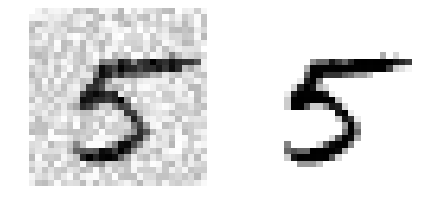

In [231]:
idx = 5500
plt.subplot(121); plot_digit(X_test_mod[idx])
plt.subplot(122); plot_digit(y_test_mod[idx])
save_fig("noisy_digit_plot")
plt.show()

saving figure clean_digit_plot


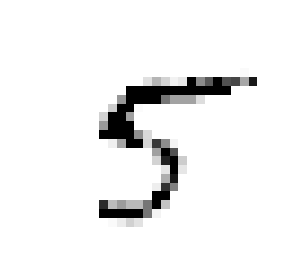

In [234]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[idx]]) # Âä† [] !
plot_digit(clean_digit)
save_fig("clean_digit_plot")
plt.show()

#### KNNÂàÜÁ±ªÂô®

In [236]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights="distance", n_neighbors=4) # -1: all cores distance:Ë∑ùÁ¶ªËøë ÊùÉÈáçÂ§ß
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [238]:
from sklearn.metrics import accuracy_score

y_test_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_pred) # Â§ßÁ∫¶2min

0.9714

In [239]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0): # new ÊåáÊñ∞Âá∫Êù•ÁöÑ input‰πãÂ§ñÁöÑÁÇπÁöÑÈªòËÆ§ÂÄº
    return shift(digit_array.reshape([28, 28]), [dy, dx], cval=new).reshape(784) # dx, dy -> dy, dx

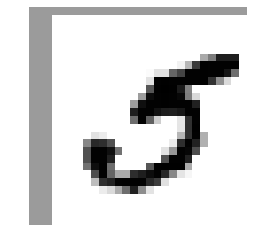

In [249]:
plot_digit(shift_digit(X[36000], 3, 1, new=100)) # + for right and down

In [247]:
# ÂõæÁâáÂπ≥ÁßªÊù•Â¢ûÂπøÊ†∑Êú¨
X_train_expanded = [X_train]
y_train_expanded = [y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_img = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_img) # append: +1
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape

(300000, 784)

In [248]:
y_train_expanded.shape

(300000,)

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)
y_ex_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_ex_pred)


### ÁªÉ‰π†

#### Dummy (random) classifier

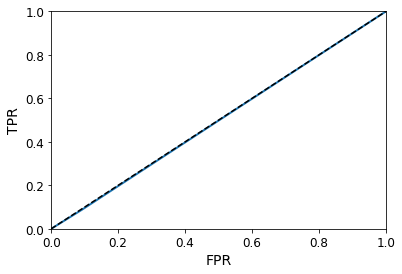

In [235]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:,1]
fpr_r, tpr_r, thresholds_r = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fpr_r, tpr_r) # ‰∏çÁî®thresholds_rÔºåÂ∞±‰∏§ÂèòÈáè

#### gridsearchÊèêÈ´òÂáÜÁ°ÆÁéá

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"weights": ["uniform", "distance"], "n_neighbors": [3,4,5]}]
knn_clf = KNeighborsClassifier()
# ËÆ≠ÁªÉÈõÜÂàÜ5ÂàÜ Áïô‰∏Ä‰∏™È™åËØÅ ‰∏ÄËΩÆ5Ê¨° 6‰∏™ÂèÇÊï∞ÁªÑÂêà ÊÄªÂÖ±30Ê¨°fit
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1) 
grid_search.fit(X_train, y_train) # ÊØîËæÉËÄóÊó∂Èó¥

In [ ]:
grid_search.best_params_ # 4, distance
grid_search.best_score_ # 0.97325

#### data aug.

In [257]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1]) # [-1]: to 1D, ÂÖ∑‰ΩìÂ§öÂ∞ëËá™Â∑±ÁÆó

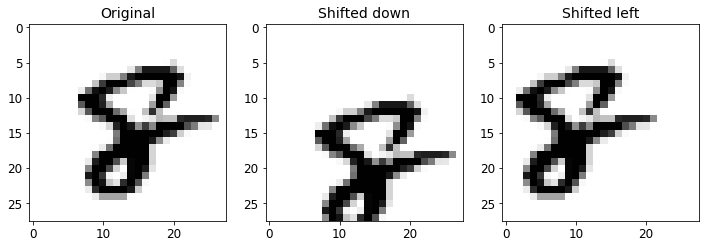

In [260]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape((28,28)), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [262]:
X_train_aug = [X_train]
y_train_aug = [y_train]
for dx, dy in((1, 0), (-1, 0), (0, 1), (0, -1)):
    img_aug = np.apply_along_axis(shift_image, arr=X_train, axis=1, dx=dx, dy=dy)
    X_train_aug.append(img_aug)
    y_train_aug.append(y_train)
    
X_train_aug = np.concatenate(X_train_aug)
y_train_aug = np.concatenate(y_train_aug)

In [264]:
X_train_aug.shape

(300000, 784)

In [265]:
shuffle_idx = np.random.permutation(300000)
X_train_aug = X_train_aug[shuffle_idx]
y_train_aug = y_train_aug[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_aug, y_train_aug)
y_test_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_knn_pred) # 0.9763, 0.5% up!

### TitanicÊï∞ÊçÆÈõÜ

In [270]:
import os
import pandas as pd

TITANIC_PATH = os.path.join("datasets", "titanic")
def load_titanic_data(filename, path=TITANIC_PATH):
    file_path = os.path.join(path, filename)
    return pd.read_csv(file_path)

In [271]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [272]:
train_data.head() # Parch: Ëàπ‰∏äÁöÑÂ≠êÂ•≥ÂíåÁà∂ÊØç‰∫∫Êï∞ Fare: Á•®‰ª∑ Embarked: ‰∏äËàπÂú∞ÁÇπ

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [273]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [274]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [277]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [278]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [282]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### preprocessing: num. col. & cat. col.

In [283]:
from sklearn.base import BaseEstimator, TransformerMixin

# ËØ•transformer‰ªédataFrame‰∏≠ÈÄâÂèñËã•Âπ≤Âàó
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]  

In [285]:
# numÂàóÁöÑpipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ("imputer", SimpleImputer(strategy="median"))
])

In [287]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [300]:
# stringÂàóÁöÑimputer: fill with most freq.
class MostFreqImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # ‰ªécatÂàóÈáåÈù¢ÊâæÂà∞ÊØè‰∏™ÂàóÂá∫Áé∞ÊúÄÂ§öÁöÑdata Áî®ÂÆÉÊù•Â°´ÂÖÖNaN
        self.most_freq_ = pd.Series([X[col].value_counts().index[0] for col in X], index=X.columns)
        return self
    def transform(self, X, y=None): # self is Obj. of class Most.., X is train_data
        return X.fillna(self.most_freq_)

In [301]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ("imputer", MostFreqImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [303]:
cat_pipeline.fit_transform(train_data).shape

(891, 8)

In [304]:
# Â∞Ü‰∏§‰∏™piplineÁªÑÂêàËµ∑Êù•
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [307]:
X_train = preprocess_pipeline.fit_transform(train_data)
y_train = train_data["Survived"]

In [308]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(preprocess_pipeline.fit_transform(test_data)) # pd.to_csv(pd.DataFrame(y_pred), header=None, index=None)

In [310]:
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [311]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7365250822835092

In [315]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
type(forest_scores)

numpy.ndarray

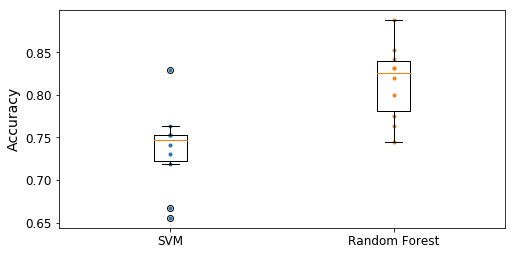

In [316]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".") # 10‰∏™ÂùêÊ†á
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest")) # ÁÆ±ÂûãÂõæ
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [319]:
# ÁâπÂæÅÂ∑•Á®ã: Âπ¥ÈæÑÂàÜÁ±ª Â∞Ünumerical -> catagorical
train_data["AgeBucket"] = train_data["Age"] // 15 * 15 # [0-15],[15-30],...
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean() # dataFrame

Survived
AgeBucket          
0.0        0.576923
15.0       0.362745
30.0       0.423256
45.0       0.404494
60.0       0.240000
75.0       1.000000

### ÂûÉÂúæÈÇÆ‰ª∂ÂàÜÁ±ª 

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

# ÁΩëÁªúÈóÆÈ¢òÔºü‰∏äËøô‰∏™ÁΩëÁ´ôÊâãÂä®‰∏ã
def fetch_spam_data(spam_path=SPAM_PATH): # default path: SP..
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [2]:
fetch_spam_data()

In [9]:
!pwd
sorted(os.listdir("."))

/Users/chris/tensorflow/handsonml


['.DS_Store',
 '.ipynb_checkpoints',
 '01_landscape.ipynb',
 '02_end2end_ml_project.ipynb',
 '03classification.ipynb',
 'datasets',
 'final_model.pkl',
 'fundamentals',
 'images',
 'Êú™ÂëΩÂêç.ipynb']

In [11]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20] #ÈáåÈù¢Êúâ‰∏™cmd Áî®lenÊù•ËøáÊª§Êéâ & ÊéíÂ∫è

In [13]:
len(spam_filenames)

500

#### pythonÁöÑemailÊ®°ÂùóÂ§ÑÁêÜÈÇÆ‰ª∂ÁöÑheader„ÄÅÁºñÁ†ÅÁ≠â

In [22]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH): # ÊúâÈªòËÆ§ÂÄºÁöÑÊîæÂèÇÊï∞listÂêéÈù¢ ‰πãÂêéË∞ÉÁî®Êó∂‰∏çÁî®‰º†ÂÄº‰∫Ü
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f) # Ê≤°Êúâreturn Â∞±ÊàêNoneType‰∫Ü

In [23]:
ham_email = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_email = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [28]:
print(ham_email[1].get_content().strip()) # EmailMessage Object

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


#### Ê£ÄÊü•ÈÇÆ‰ª∂ÁöÑÁªìÊûÑÔºàÂèØËÉΩÂåÖÂê´Â§öÁßçÁªìÊûÑÔºâ

In [56]:
def get_email_stucture(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload() # payload?
    if isinstance(payload, list):
        # f''ÈáåÈù¢ÁöÑ‚Äú‚ÄùÊòØÂ≠óÈù¢ÈáèÔºå‰∏∫‰ªÄ‰πà‰∏çËÉΩÂ∞Ü[]Êç¢Ë°åÊãÜÂºÄÔºåEOL error?
        return f'mulltipart({", ".join([get_email_stucture(sub_) for sub_ in payload])})'
    else:
        return email.get_content_type()

In [52]:
f'mu({", ".join(["sj", "jfei"])})'

'mu(sj, jfei)'

In [53]:
str2 = """aaa'''bbb"""
str2

"aaa'''bbb"

In [46]:
from collections import Counter

def structures_counter(emails):
    counter = Counter()
    for email in emails:
        structure = get_email_stucture(email)
        counter[structure] += 1
    return counter

In [57]:
structures_counter(ham_email).most_common() # ÂûÉÂúæÈÇÆ‰ª∂ÁªìÊûÑÊõ¥‰∏∞ÂØåüê¥

[('text/plain', 2408),
 ('mulltipart(text/plain, application/pgp-signature)', 66),
 ('mulltipart(text/plain, text/html)', 8),
 ('mulltipart(text/plain, text/plain)', 4),
 ('mulltipart(text/plain)', 3),
 ('mulltipart(text/plain, application/octet-stream)', 2),
 ('mulltipart(text/plain, text/enriched)', 1),
 ('mulltipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('mulltipart(mulltipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('mulltipart(text/plain, video/mng)', 1),
 ('mulltipart(text/plain, mulltipart(text/plain))', 1),
 ('mulltipart(text/plain, application/x-pkcs7-signature)', 1),
 ('mulltipart(text/plain, mulltipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('mulltipart(text/plain, mulltipart(text/plain, text/plain), mulltipart(mulltipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('mulltipart(text/plain, application/x-java-applet)', 1)]

In [58]:
structures_counter(spam_email).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('mulltipart(text/plain, text/html)', 45),
 ('mulltipart(text/html)', 20),
 ('mulltipart(text/plain)', 19),
 ('mulltipart(mulltipart(text/html))', 5),
 ('mulltipart(text/plain, image/jpeg)', 3),
 ('mulltipart(text/html, application/octet-stream)', 2),
 ('mulltipart(text/plain, application/octet-stream)', 1),
 ('mulltipart(text/html, text/plain)', 1),
 ('mulltipart(mulltipart(text/html), application/octet-stream, image/jpeg)',
  1),
 ('mulltipart(mulltipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [62]:
# spam_email[0].items() EmailMessage -> header items(list)
for header, value in spam_email[0].items():
    print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [64]:
spam_email[0]["Subject"] # EmailMessage is list-like object

'Life Insurance - Why Pay More?'

#### train test set

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_email + spam_email)
y = np.array([0] * len(ham_email) + [1] * len(spam_email))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_test[:5]

array([<email.message.EmailMessage object at 0x10996a978>,
       <email.message.EmailMessage object at 0x109c36400>], dtype=object)

* [regular expression .* vs .*?](https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions) 
* [re grammer](https://www.runoob.com/regexp/regexp-syntax.html)

In [76]:
import re
string = 'eeeAiiZuuuuAoooZeeAZee'
re.findall('A.*?Z',string) # non-greedy: ÂÖàÂ∞ΩÂèØËÉΩÁöÑÂ∞ëmatch . ÂÜçÈÄêÊ∏êÂ¢ûÂä† .
#re.findall('A.*Z',string) # greedy: ‰∏ÄÁõ¥match . Áõ¥Âà∞unmatchÂÜçÂõûÊ∫ØÊâæZ

['AiiZ', 'AoooZ', 'AZ']

In [75]:
from html import unescape
t =  '&lt;abc&gt;'
txt = unescape(t)
txt

'<abc>'

#### html -> text
* drop `<head>` section
* `<a>` -> HYPERLINK
* drop all html tag
* multi newlines -> single newline
* unescape html entites (`&gt;` or `&nbsp;`) <br/> re.M multi-line <br/> re.S: match all .(\n included) <br/> re.I: case-insensitive

In [78]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I) 
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [80]:
html_spam_emails = [email for email in X_train[y_train==1] if get_email_stucture(email) == 'text/html']
sample = html_spam_emails[7]
print(sample.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [82]:
print(html_to_plain_text(sample.get_content().strip())[:1000], "...") # ÂÖàto_text ÂÜçÂèñÂâç1000‰∏™„ÄÇ„ÄÇ„ÄÇ


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 bil

In [84]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in('text/plain', 'text/html'):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if ctype == 'text/plain':
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [85]:
print(email_to_text(sample)[:100], "...")


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


#### nltkÂ§ÑÁêÜÂàÜËØç

In [87]:
import nltk
stemmer = nltk.PorterStemmer()
for word in("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
    print(word, '=>', stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [88]:
!pip install urlextract

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [95]:
try:
    import urlextract
    url_extractor = urlextract.URLExtract()
    print(urlextractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("ERROR: urlextract module needed!")
    urlextractor = None


['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


[regex grammer](https://docs.python.org/3/library/re.html)
* r'': raw string
* \d: numerical 
* ?: is for non capturing group ÈùûÂºïÁî®ÊçïËé∑ ÊèêÈ´òÈÄüÂ∫¶
* [eE]: e or E
* match: 3.5, 3.1e10
* \W: not `<alphanumeric> & _`

In [119]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            # re.subÈáåÈù¢Ê≤°Êúâr''‰πü‰∏ÄÊ†∑Ôºå‰∏çËøáÊ≠£ÂàôË°®ËææÂºèÈáåÈù¢‰∏ÄËà¨ÈÉΩÊòØÊúârÁöÑ
            if self.replace_numbers: # Êï∞Â≠ó-> flag
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', ' NUMBER ', text) # NUMBERÂ∫îËØ•Ë¶ÅÊúâÁ©∫Ê†ºÁöÑ ÊòØ‰∏Ä‰∏™ÁâπÂæÅ
            # ÊôÆÈÄöÁöÑstring: \\ ÊâçÊòØ\, r'': byte string, ur'': unicode string
            if self.remove_punctuation: # ÂéªÊéâÊ†áÁÇπÁ¨¶Âè∑
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter() # dict-like object
                for word, count in word_counts.items(): # -> dict's key & value
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed) # dict list -> ndarray

#### Ê†∏ÂøÉÊÄùÊÉ≥ÔºöÊï∞ÊçÆÊ∏ÖÊ¥óÂêéÊ†πÊçÆÈ´òÈ¢ëËØçÊù•ÂÅöÂõûÂΩíÂàÜÊûêÔºåÊèêÂèñÁöÑÁâπÂæÅÊúâ URLÊï∞„ÄÅÊï∞Â≠óÊï∞„ÄÅÁõ∏ÂêåËØçÊ∫êÁöÑÊï∞

In [120]:
from scipy.sparse import csr_matrix
# Compressed Sparse Row matrix Â§ßÈÉ®ÂàÜÊòØ0Ôºårow colÂØπÂ∫îÁöÑ‰ΩçÁΩÆÊòØdata
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10) # ?
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.most_common_ = most_common
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                # 0: keyÊâæ‰∏çÂà∞Êó∂ÁöÑËøîÂõûÁöÑÈªòËÆ§ÂÄºÔºåÊü•Â≠óÂÖ∏ -> ÊâæÂà∞ËØ•ËØçÂØπÂ∫îÁöÑindex(ÁâπÂæÅÔºöÈ´òÈ¢ëËØç)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count) # wordÊéíÁ¨¨Âá†Âàó
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1)) # id is 1-based, so + 1

In [121]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)
X_train_transformed.shape

(2400, 1001)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="liblinear", random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ................................... , score=0.9875, total=   0.0s
[CV]  ................................................................
[CV] .................................. , score=0.98625, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=0.99125, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


0.9883333333333333

In [129]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test) # ÊµãËØïÈõÜÊï∞ÊçÆtransform

log_clf = LogisticRegression(solver="liblinear", random_state=42) # 1„ÄÅnew ÂàÜÁ±ªÂô®ÂØπË±°
log_clf.fit(X_train_transformed, y_train) # 2„ÄÅfit

y_pred = log_clf.predict(X_test_transformed) # 3„ÄÅpredict

print(f"Precision: {100 * precision_score(y_test, y_pred):.2f}")
print(f"Recall: {100 * recall_score(y_test, y_pred):.2f}")

Precision: 94.90
Recall: 97.89


In [105]:
np.dot(np.array([2,1,4]), np.array([[3], [4], [2]])) # not a scaler, a single matrix

array([18])

In [135]:
a = f"{3+1:2d}et"
a

' 4et'